In [1]:
import requests
import pandas as pd
from datetime import datetime
import os
from keras.models import load_model

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Scaricamento con libreria yfinance

In [105]:
import yfinance as yf

# Scarica i dati di Bitcoin in USD
btc = yf.Ticker("BTC-EUR")
data = btc.history(start="2014-09-17", end="2024-04-25")

data = data.reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,359.546204,361.468506,351.586884,355.957367,16389166,0.0,0.0
1,2014-09-18 00:00:00+00:00,355.588409,355.505402,319.789459,328.539368,26691849,0.0,0.0
2,2014-09-19 00:00:00+00:00,328.278503,330.936707,298.921021,307.761139,29560103,0.0,0.0
3,2014-09-20 00:00:00+00:00,307.665253,329.978180,303.931244,318.758972,28736826,0.0,0.0
4,2014-09-21 00:00:00+00:00,318.120514,321.504517,306.502197,310.632446,20702625,0.0,0.0
...,...,...,...,...,...,...,...,...
3503,2024-04-20 00:00:00+00:00,59675.082031,61440.464844,56170.074219,59876.710938,46818669689,0.0,0.0
3504,2024-04-21 00:00:00+00:00,59883.777344,61376.257812,59247.250000,60956.074219,21662346331,0.0,0.0
3505,2024-04-22 00:00:00+00:00,60954.554688,61639.593750,60245.773438,60919.242188,19240933719,0.0,0.0
3506,2024-04-23 00:00:00+00:00,60927.675781,63113.457031,60496.617188,62729.296875,26544206489,0.0,0.0


In [106]:
# data.to_csv("Bitcoin (€) da yfinance dal 17-09-2014 al 25-04-2024.csv")

### Scaricamento con chiamata API

In [95]:
# secondi_inizio = '1230768000'
# secondi_fine = '1702425600'
# url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
# params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo 28 04 13 - 13 12 23

data0 = datetime(1970, 1, 1, 0, 0, 0)
data2 = datetime(2024, 4, 25, 0, 0, 0)
data1 = data2 - pd.Timedelta(days=360) # data2 - pd.Timedelta(days=360) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1 - data0).total_seconds()))
secondi_fine = str(int((data2 - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'eur', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data = response.json()

# Preprocess the data
prices = data['prices']
timestamps = [x[0] for x in prices]
values = [x[1] for x in prices]

# Convert the preprocessed data into a DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Price (€)': values})

# Convert the timestamps to a readable format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Save the DataFrame to a CSV file
# df.to_csv(f'bitcoin_data_{data1.day}-{data1.month}-{data1.year}_{data2.day}-{data2.month}-{data2.year}_granularità_1_giorno.csv', index=False)

In [79]:
data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [78]:
data

{'prices': [[1704067200000, 38240.20908960317],
  [1704153600000, 40022.56708386281],
  [1704240000000, 41121.44236936086],
  [1704326400000, 39193.97344095043],
  [1704412800000, 40376.019880448854],
  [1704499200000, 40269.190802082194],
  [1704585600000, 40125.3447966974],
  [1704672000000, 40118.34311925359],
  [1704758400000, 42857.43103594771],
  [1704844800000, 42178.411061608065],
  [1704931200000, 42492.38965139214],
  [1705017600000, 42171.814324539526],
  [1705104000000, 39122.52373887039],
  [1705190400000, 39081.06524302686],
  [1705276800000, 38190.210045708205],
  [1705363200000, 38908.89747537756],
  [1705449600000, 39668.76253090919],
  [1705536000000, 39242.29028152058],
  [1705622400000, 37938.77972050555],
  [1705708800000, 38150.14288219012],
  [1705795200000, 38173.221525259156],
  [1705881600000, 38141.44573510522],
  [1705968000000, 36313.41944934261],
  [1706054400000, 36689.35973905385],
  [1706140800000, 36871.20615880076],
  [1706227200000, 36811.15855147119

In [96]:
df

,Timestamp,Price (€)
0,2023-05-01,26667.324143
1,2023-05-02,25637.378696
2,2023-05-03,26020.736482
3,2023-05-04,26183.671952
4,2023-05-05,26168.327130
...,...,...
356,2024-04-21,60862.268880
357,2024-04-22,60924.518810
358,2024-04-23,62738.591132
359,2024-04-24,62051.586061


In [97]:
df[-30:]

,Timestamp,Price (€)
331,2024-03-27,64695.825096
332,2024-03-28,64211.473978
333,2024-03-29,65526.713768
334,2024-03-30,64739.242076
335,2024-03-31,64538.552608
336,2024-04-01,66012.152930
337,2024-04-02,64987.584404
338,2024-04-03,60773.862931
339,2024-04-04,61012.095222
340,2024-04-05,63241.879136


In [68]:
df.isna().sum()

Timestamp    0
Price (€)    0
dtype: int64

In [ ]:
df_31_giorni = df[-31:]

In [ ]:
len(df_31_giorni)

3962

In [ ]:
df_31_giorni

,Timestamp,Price
0,2013-04-28,103.186200
1,2013-04-29,110.374500
2,2013-04-30,106.312800
3,2013-05-01,88.629100
4,2013-05-02,80.592300
...,...,...
3957,2024-02-29,57717.736389
3958,2024-03-01,56734.564616
3959,2024-03-02,57560.483900
3960,2024-03-03,57229.676585


In [ ]:
giorno_iniziale = df_31_giorni['Timestamp'].iloc[0].day
mese_iniziale = df_31_giorni['Timestamp'].iloc[0].month
anno_iniziale = df_31_giorni['Timestamp'].iloc[0].year

giorno_finale = df_31_giorni['Timestamp'].iloc[-1].day
mese_finale = df_31_giorni['Timestamp'].iloc[-1].month
anno_finale = df_31_giorni['Timestamp'].iloc[-1].year

In [ ]:
# df.to_csv(f"bitcoin_data_{giorno_iniziale}-{mese_iniziale}-{anno_iniziale}_{giorno_finale}-{mese_finale}-{anno_finale}_granularità_1_giorno.csv", index=False)

### Trasformo il dataset come voglio io (accorcio e allargo)

In [ ]:
passato = 1500
futuro = 30

# Creazione di un nuovo DataFrame
nuovo_df = pd.DataFrame()

# Iterazione attraverso il DataFrame originale
for i in range(passato, len(df) - futuro):
    riga = {}

    # Colonna "prezzo_presente"
    riga['prezzo_presente'] = df['Price (€)'].iloc[i]

    # Colonne "prezzo_passato_x"
    for j in range(1, passato + 1):
        colonna_passato = f'prezzo_passato_{j}'
        riga[colonna_passato] = df['Price (€)'].iloc[i - j]

    # Colonne "prezzo_futuro_x"
    for k in range(1, futuro + 1):
        colonna_futuro = f'prezzo_futuro_{k}'
        riga[colonna_futuro] = df['Price (€)'].iloc[i + k]

    # Aggiungi la colonna del timestamp
    riga['Timestamp'] = df['Timestamp'].iloc[i]

    # Aggiungi la riga al nuovo DataFrame
    nuovo_df = nuovo_df.append(riga, ignore_index=True)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_60152\1593305583.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuovo_df = nuovo_df.append(riga, ignore_index=True)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_60152\1593305583.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuovo_df = nuovo_df.append(riga, ignore_index=True)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_60152\1593305583.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuovo_df = nuovo_df.append(riga, ignore_index=True)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_60152\1593305583.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nuovo_df = n

In [ ]:
nuovo_df

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_futuro_22,prezzo_futuro_23,prezzo_futuro_24,prezzo_futuro_25,prezzo_futuro_26,prezzo_futuro_27,prezzo_futuro_28,prezzo_futuro_29,prezzo_futuro_30,Timestamp
0,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,2072.354900,1939.995600,...,2179.708192,2135.587135,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2017-06-08 23:39:21.692
1,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,2072.354900,...,2135.587135,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2017-06-09 00:00:00.000
2,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,...,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2017-06-10 00:00:00.000
3,2689.051900,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,...,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2052.287611,2017-06-11 00:00:00.000
4,2413.900500,2689.051900,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,...,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2052.287611,2091.209408,2017-06-12 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,38141.445735,38173.221525,...,48367.898536,47916.290054,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,2024-01-30 00:00:00.000
2428,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,38141.445735,...,47916.290054,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,2024-01-31 00:00:00.000
2429,39390.455612,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,...,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,57560.483900,2024-02-01 00:00:00.000
2430,39601.985426,39390.455612,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,...,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,57560.483900,57229.676585,2024-02-02 00:00:00.000


In [ ]:
# Definisco una funzione per spostare le colonne all'inizio del dataset
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)

# Sposto la colonna "Timestamp" all'inizio
move_column_inplace(nuovo_df, 'Timestamp', 0)

In [ ]:
nuovo_df

,Timestamp,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,...,prezzo_futuro_21,prezzo_futuro_22,prezzo_futuro_23,prezzo_futuro_24,prezzo_futuro_25,prezzo_futuro_26,prezzo_futuro_27,prezzo_futuro_28,prezzo_futuro_29,prezzo_futuro_30
0,2017-06-08 23:39:21.692,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,2072.354900,...,2238.963369,2179.708192,2135.587135,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528
1,2017-06-09 00:00:00.000,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,...,2179.708192,2135.587135,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631
2,2017-06-10 00:00:00.000,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,...,2135.587135,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925
3,2017-06-11 00:00:00.000,2689.051900,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,...,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2052.287611
4,2017-06-12 00:00:00.000,2413.900500,2689.051900,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,...,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2052.287611,2091.209408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2024-01-30 00:00:00.000,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,38141.445735,...,48043.597882,48367.898536,47916.290054,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389
2428,2024-01-31 00:00:00.000,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,...,48367.898536,47916.290054,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616
2429,2024-02-01 00:00:00.000,39390.455612,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,...,47916.290054,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,57560.483900
2430,2024-02-02 00:00:00.000,39601.985426,39390.455612,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,...,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,57560.483900,57229.676585


In [ ]:
giorno_iniziale = df['Timestamp'].iloc[0].day
mese_iniziale = df['Timestamp'].iloc[0].month
anno_iniziale = df['Timestamp'].iloc[0].year

giorno_finale = df['Timestamp'].iloc[-1].day
mese_finale = df['Timestamp'].iloc[-1].month
anno_finale = df['Timestamp'].iloc[-1].year

<h6> Aggiungo giorno, mese e anno come colonne al posto di Timestamp </h6>

In [ ]:
nuovo_df['Giorno'] = nuovo_df['Timestamp'].apply(lambda x: x.day)
nuovo_df['Mese'] = nuovo_df['Timestamp'].apply(lambda x: x.month)
nuovo_df['Anno'] = nuovo_df['Timestamp'].apply(lambda x: x.year)

In [ ]:
nuovo_df = nuovo_df.drop('Timestamp', axis=1)

In [ ]:
nuovo_df

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_futuro_24,prezzo_futuro_25,prezzo_futuro_26,prezzo_futuro_27,prezzo_futuro_28,prezzo_futuro_29,prezzo_futuro_30,Giorno,Mese,Anno
0,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,2072.354900,1939.995600,...,2204.251340,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,8,6,2017
1,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,2072.354900,...,2266.818339,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,9,6,2017
2,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,2173.665100,...,2299.748387,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,10,6,2017
3,2689.051900,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,2228.136100,...,2296.449190,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2052.287611,11,6,2017
4,2413.900500,2689.051900,2623.630900,2517.886400,2520.805200,2412.539200,2573.405500,2418.635100,2266.554700,2271.276500,...,2287.340707,2200.484001,2248.614528,2209.809631,2073.873925,2052.287611,2091.209408,12,6,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,38141.445735,38173.221525,...,47410.493801,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,30,1,2024
2428,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,38141.445735,...,46933.944013,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,31,1,2024
2429,39390.455612,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,36313.419449,...,47591.241230,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,57560.483900,1,2,2024
2430,39601.985426,39390.455612,39555.506056,39930.075700,38759.180185,38771.396298,38535.125270,36811.158551,36871.206159,36689.359739,...,47833.386650,50208.135988,52573.782675,57717.736389,56734.564616,57560.483900,57229.676585,2,2,2024


In [ ]:
# nuovo_df.to_csv(f"Dataset Bitcoin+ esteso da me (passato_{passato}, futuro_{futuro}, periodo originale dal {giorno_iniziale}-{mese_iniziale}-{anno_iniziale} al {giorno_finale}-{mese_finale}-{anno_finale}).csv", index=False)

### Trasformo il dataset con le variazioni come voglio io (accorcio e allargo)

In [55]:
dati = pd.read_csv('bitcoin_data_28-4-2013_4-3-2024_granularità_1_giorno.csv')
dati

,Timestamp,Price (€)
0,2013-04-28 00:00:00.000,103.186200
1,2013-04-29 00:00:00.000,110.374500
2,2013-04-30 00:00:00.000,106.312800
3,2013-05-01 00:00:00.000,88.629100
4,2013-05-02 00:00:00.000,80.592300
...,...,...
3957,2024-02-29 00:00:00.000,57717.736389
3958,2024-03-01 00:00:00.000,56734.564616
3959,2024-03-02 00:00:00.000,57560.483900
3960,2024-03-03 00:00:00.000,57229.676585


In [56]:
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

In [57]:
dati_con_variazioni = dati.copy()

In [58]:
# Calcola la variazione rispetto al giorno precedente
dati_con_variazioni["Variazioni"] = dati_con_variazioni["Price (€)"].diff()

# Assegna "+" o "-" in base alla variazione
dati_con_variazioni["Variazioni"] = dati_con_variazioni["Variazioni"].apply(lambda x: "+" if x >= 0 else "-")

# Cancello la prima riga perchè in realtà quella non può sapere se la variazione è positiva o negativa
dati_con_variazioni = dati_con_variazioni.drop(0, axis = 0).reset_index(drop=True)

dati_con_variazioni

,Timestamp,Price (€),Variazioni
0,2013-04-29,110.374500,+
1,2013-04-30,106.312800,-
2,2013-05-01,88.629100,-
3,2013-05-02,80.592300,-
4,2013-05-03,75.157500,-
...,...,...,...
3956,2024-02-29,57717.736389,+
3957,2024-03-01,56734.564616,-
3958,2024-03-02,57560.483900,+
3959,2024-03-03,57229.676585,-


In [59]:
passato = 1500
futuro = 1

# Creazione di un nuovo DataFrame
nuovo_df_var = pd.DataFrame()

# Iterazione attraverso il DataFrame originale
for i in range(passato, len(dati_con_variazioni) - futuro):
    riga = {}

    # Colonna "variazione_presente"
    riga['variazione_presente'] = dati_con_variazioni['Variazioni'].iloc[i]

    # Colonne "variazione_passato_x"
    for j in range(1, passato + 1):
        colonna_passato = f'variazione_passato_{j}'
        riga[colonna_passato] = dati_con_variazioni['Variazioni'].iloc[i - j]

    # Colonne "variazione_futuro_x"
    for k in range(1, futuro + 1):
        colonna_futuro = f'variazione_futuro_{k}'
        riga[colonna_futuro] = dati_con_variazioni['Variazioni'].iloc[i + k]

    # Aggiungo la colonna del timestamp
    riga['Timestamp'] = dati_con_variazioni['Timestamp'].iloc[i]

    # Aggiungo la riga al nuovo DataFrame
    nuovo_df_var = pd.concat([nuovo_df_var, pd.DataFrame([riga])], ignore_index=True)

In [60]:
nuovo_df_var

,variazione_presente,variazione_passato_1,variazione_passato_2,variazione_passato_3,variazione_passato_4,variazione_passato_5,variazione_passato_6,variazione_passato_7,variazione_passato_8,variazione_passato_9,...,variazione_passato_1493,variazione_passato_1494,variazione_passato_1495,variazione_passato_1496,variazione_passato_1497,variazione_passato_1498,variazione_passato_1499,variazione_passato_1500,variazione_futuro_1,Timestamp
0,-,+,-,+,+,-,+,+,+,+,...,-,+,+,-,-,-,-,+,+,2017-06-09
1,+,-,+,-,+,+,-,+,+,+,...,-,-,+,+,-,-,-,-,+,2017-06-10
2,+,+,-,+,-,+,+,-,+,+,...,+,-,-,+,+,-,-,-,-,2017-06-11
3,-,+,+,-,+,-,+,+,-,+,...,-,+,-,-,+,+,-,-,+,2017-06-12
4,+,-,+,+,-,+,-,+,+,-,...,+,-,+,-,-,+,+,-,-,2017-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,+,+,+,+,-,-,-,+,-,+,...,+,-,+,-,-,+,-,-,+,2024-02-28
2456,+,+,+,+,+,-,-,-,+,-,...,+,+,-,+,-,-,+,-,-,2024-02-29
2457,-,+,+,+,+,+,-,-,-,+,...,+,+,+,-,+,-,-,+,+,2024-03-01
2458,+,-,+,+,+,+,+,-,-,-,...,-,+,+,+,-,+,-,-,-,2024-03-02


In [61]:
# Definisco una funzione per spostare le colonne all'inizio del dataset
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)

# Sposto la colonna "Timestamp" all'inizio
move_column_inplace(nuovo_df_var, 'Timestamp', 0)

In [62]:
nuovo_df_var

,Timestamp,variazione_presente,variazione_passato_1,variazione_passato_2,variazione_passato_3,variazione_passato_4,variazione_passato_5,variazione_passato_6,variazione_passato_7,variazione_passato_8,...,variazione_passato_1492,variazione_passato_1493,variazione_passato_1494,variazione_passato_1495,variazione_passato_1496,variazione_passato_1497,variazione_passato_1498,variazione_passato_1499,variazione_passato_1500,variazione_futuro_1
0,2017-06-09,-,+,-,+,+,-,+,+,+,...,-,-,+,+,-,-,-,-,+,+
1,2017-06-10,+,-,+,-,+,+,-,+,+,...,+,-,-,+,+,-,-,-,-,+
2,2017-06-11,+,+,-,+,-,+,+,-,+,...,-,+,-,-,+,+,-,-,-,-
3,2017-06-12,-,+,+,-,+,-,+,+,-,...,+,-,+,-,-,+,+,-,-,+
4,2017-06-13,+,-,+,+,-,+,-,+,+,...,-,+,-,+,-,-,+,+,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2024-02-28,+,+,+,+,-,-,-,+,-,...,+,+,-,+,-,-,+,-,-,+
2456,2024-02-29,+,+,+,+,+,-,-,-,+,...,+,+,+,-,+,-,-,+,-,-
2457,2024-03-01,-,+,+,+,+,+,-,-,-,...,-,+,+,+,-,+,-,-,+,+
2458,2024-03-02,+,-,+,+,+,+,+,-,-,...,+,-,+,+,+,-,+,-,-,-


In [63]:
giorno_iniziale = dati['Timestamp'].iloc[0].day
mese_iniziale = dati['Timestamp'].iloc[0].month
anno_iniziale = dati['Timestamp'].iloc[0].year

giorno_finale = dati['Timestamp'].iloc[-1].day
mese_finale = dati['Timestamp'].iloc[-1].month
anno_finale = dati['Timestamp'].iloc[-1].year

<h6> Aggiungo giorno, mese e anno come colonne al posto di Timestamp </h6>

In [64]:
nuovo_df_var['Giorno'] = nuovo_df_var['Timestamp'].apply(lambda x: x.day)
nuovo_df_var['Mese'] = nuovo_df_var['Timestamp'].apply(lambda x: x.month)
nuovo_df_var['Anno'] = nuovo_df_var['Timestamp'].apply(lambda x: x.year)

In [65]:
nuovo_df_var = nuovo_df_var.drop('Timestamp', axis=1)

In [66]:
nuovo_df_var

,variazione_presente,variazione_passato_1,variazione_passato_2,variazione_passato_3,variazione_passato_4,variazione_passato_5,variazione_passato_6,variazione_passato_7,variazione_passato_8,variazione_passato_9,...,variazione_passato_1495,variazione_passato_1496,variazione_passato_1497,variazione_passato_1498,variazione_passato_1499,variazione_passato_1500,variazione_futuro_1,Giorno,Mese,Anno
0,-,+,-,+,+,-,+,+,+,+,...,+,-,-,-,-,+,+,9,6,2017
1,+,-,+,-,+,+,-,+,+,+,...,+,+,-,-,-,-,+,10,6,2017
2,+,+,-,+,-,+,+,-,+,+,...,-,+,+,-,-,-,-,11,6,2017
3,-,+,+,-,+,-,+,+,-,+,...,-,-,+,+,-,-,+,12,6,2017
4,+,-,+,+,-,+,-,+,+,-,...,+,-,-,+,+,-,-,13,6,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,+,+,+,+,-,-,-,+,-,+,...,+,-,-,+,-,-,+,28,2,2024
2456,+,+,+,+,+,-,-,-,+,-,...,-,+,-,-,+,-,-,29,2,2024
2457,-,+,+,+,+,+,-,-,-,+,...,+,-,+,-,-,+,+,1,3,2024
2458,+,-,+,+,+,+,+,-,-,-,...,+,+,-,+,-,-,-,2,3,2024


In [67]:
# nuovo_df_var.to_csv(f"Dataset Bitcoin+ con variazioni esteso da me (passato_{passato}, futuro_{futuro}, periodo originale dal {giorno_iniziale}-{mese_iniziale}-{anno_iniziale} al {giorno_finale}-{mese_finale}-{anno_finale}).csv", index=False)

### Grafico dataset iniziale

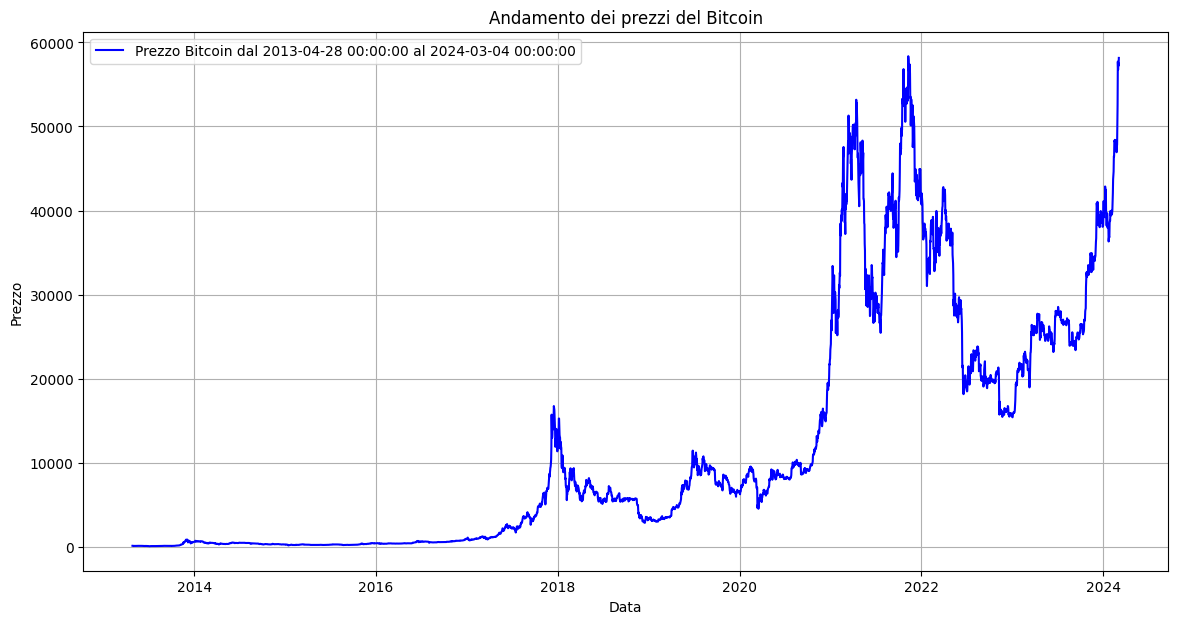

In [29]:
import matplotlib.pyplot as plt

# # Imposta 'Timestamps' come indice del DataFrame
# df.set_index('Timestamp', inplace=True)

# Disegno il grafico dell'andamento dei prezzi
plt.figure(figsize=(14, 7))
plt.plot(df['Timestamp'], df['Price (€)'], label=f"Prezzo Bitcoin dal {str(df['Timestamp'].iloc[0])} al {str(df['Timestamp'].iloc[-1])}", color='blue')
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
df

,Timestamp,Price (€)
0,2013-04-28,103.186200
1,2013-04-29,110.374500
2,2013-04-30,106.312800
3,2013-05-01,88.629100
4,2013-05-02,80.592300
...,...,...
3957,2024-02-29,57717.736389
3958,2024-03-01,56734.564616
3959,2024-03-02,57560.483900
3960,2024-03-03,57229.676585


### Testo un modello su un dataset di 31 giorni

<h6> Definisco una funzione per ottenere il percorso del modello che scelgo </h6>

In [173]:
def trova_modello(numero_cartella_scelta, numero_modello_scelto, percorso_modelli, formato):
    # Verifico che il percorso esista
    if not os.path.exists(percorso_modelli):
        print(f"Il percorso {percorso_modelli} non esiste.")
        return None

    # Itero attraverso tutte le cartelle e sottocartelle nel percorso
    for root, dirs, files in os.walk(percorso_modelli):
        for file in files:
            if file.startswith(str(numero_modello_scelto)) and file.endswith(formato) and root.split("\\")[-2].split(" - ")[0] == str(numero_cartella_scelta):
                # Restituisco il percorso completo del file trovato
                return os.path.join(root, file)

    # Se nessun file è stato trovato
    print(f"Nessun file {formato} trovato per il numero {numero_modello_scelto} nel percorso {percorso_modelli}.")
    return None

In [174]:
numero_cartella_scelta = 12

In [175]:
numero_modello_scelto = 1

In [176]:
percorso_modelli = r"C:\Users\Alessandro\Desktop\Cartelle\Mie\Programmi personali in Python\Kaggle\Bitcoin Historical Dataset\Modelli\Reti neurali"

In [177]:
percorso_modello_scelto = trova_modello(numero_cartella_scelta, numero_modello_scelto, percorso_modelli, formato=".h5")
percorso_modello_scelto

'C:\\Users\\Alessandro\\Desktop\\Cartelle\\Mie\\Programmi personali in Python\\Kaggle\\Bitcoin Historical Dataset\\Modelli\\Reti neurali\\12 - Modelli con reti neurali 20-12-2023_18-37-29 (prezzo_futuro_1_zoom_10_45)\\MAE\\1 - MAE838.928, L20, mV-10, MV10, P1, AHrelu, AOlinear, BS100, ME10000, MOval_mape, PA70, OPadam, LOmae, METmape, SV42 (20-12-2023_18-48-25).h5'

In [178]:
modello_scelto = load_model(percorso_modello_scelto)

In [179]:
modello_scelto.layers[0].get_weights()

[array([[ 3.29124260e+00, -1.17986488e+00, -1.83388591e+00,
         -7.10349083e-01, -1.26114626e+01,  3.69344711e+00,
          4.80234909e+00,  7.44889069e+00, -8.18958569e+00,
         -5.53606272e+00, -3.04871053e-01,  1.82321465e+00,
         -8.82517147e+00,  9.61277008e-01,  4.87786198e+00,
          6.57531166e+00, -7.11748171e+00,  4.24613953e-01,
          2.69088936e+00, -3.34455252e+00],
        [ 4.58844948e+00,  9.16690826e-01, -8.47894382e+00,
          3.53412151e+00,  4.45612669e+00, -3.26099157e+00,
          2.02835274e+00, -5.78748465e+00,  8.86174011e+00,
         -1.18756485e+00,  7.97084951e+00, -3.37456179e+00,
          4.76629448e+00,  5.26788712e-01, -9.97323036e-01,
         -5.68300819e+00,  5.10178185e+00,  7.43768311e+00,
         -3.83227587e+00,  1.92741346e+00],
        [-5.24719238e+00,  5.63445568e+00,  9.58534813e+00,
         -8.62596703e+00,  5.25005388e+00,  3.20574284e+00,
          1.74302578e+00, -6.70766115e+00,  4.60451984e+00,
         -3.

In [180]:
modello_scelto.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_139 (Dense)               │ (None, 20)                │        640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_140 (Dense)               │ (None, 1)                 │         21 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 663 (2.59 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [181]:
numero_cartella = percorso_modello_scelto.split('\\')[-3].split(' -')[0]
numero_cartella

'12'

In [182]:
numero_modello = percorso_modello_scelto.split('\\')[-1].split(' -')[0]
numero_modello

'1'

In [183]:
# numero_sintetici = percorso_modello.split('\\')[-3].split('SMOTE_sin')[1].split('_')[0]
# numero_sintetici

In [184]:
df_31_giorni

,Timestamp,Price
3849,2023-11-13,37067.696982
3850,2023-11-14,36549.162048
3851,2023-11-15,35545.201433
3852,2023-11-16,37903.662452
3853,2023-11-17,36201.516111
3854,2023-11-18,36527.760225
3855,2023-11-19,36582.368442
3856,2023-11-20,37413.994608
3857,2023-11-21,37489.298471
3858,2023-11-22,35965.360361


In [185]:
df_31_giorni = df_31_giorni.reset_index(drop=True)

In [186]:
df_31_giorni

,Timestamp,Price
0,2023-11-13,37067.696982
1,2023-11-14,36549.162048
2,2023-11-15,35545.201433
3,2023-11-16,37903.662452
4,2023-11-17,36201.516111
5,2023-11-18,36527.760225
6,2023-11-19,36582.368442
7,2023-11-20,37413.994608
8,2023-11-21,37489.298471
9,2023-11-22,35965.360361


In [187]:
numero_giorni = 30

df_input = pd.DataFrame({'prezzo_presente': [df_31_giorni['Price'].iloc[numero_giorni]]})

# Aggiunta delle colonne con i nomi desiderati
for i in range(0, 30):
    col_name = f"prezzo_passato_{i+1}"
    df_input[col_name] = [df_31_giorni['Price'].iloc[numero_giorni - i - 1]]

df_input

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,41450.819387,41200.962726,43757.959938,43745.491992,44202.176109,43270.11956,43788.288808,44105.944773,41974.331773,39960.27542,...,35965.360361,37489.298471,37413.994608,36582.368442,36527.760225,36201.516111,37903.662452,35545.201433,36549.162048,37067.696982


In [188]:
# Riadatto le colonne in modo che siano nello stesso ordine in cui erano durante l'allenamento di questo modello
df_input_riadattato = df_input #[['prezzo_passato_27', 'prezzo_passato_20', 'prezzo_passato_21', 'prezzo_passato_22', 'prezzo_passato_23', 'prezzo_passato_24', 'prezzo_passato_25', 'prezzo_passato_26', 'prezzo_passato_28', 'prezzo_presente', 'prezzo_passato_29', 'prezzo_passato_30', 'prezzo_passato_19', 'prezzo_passato_18', 'prezzo_passato_17', 'prezzo_passato_16', 'prezzo_passato_1', 'prezzo_passato_2', 'prezzo_passato_3', 'prezzo_passato_4', 'prezzo_passato_5', 'prezzo_passato_6', 'prezzo_passato_7', 'prezzo_passato_8', 'prezzo_passato_9', 'prezzo_passato_10', 'prezzo_passato_11', 'prezzo_passato_12', 'prezzo_passato_13', 'prezzo_passato_14', 'prezzo_passato_15']]

In [189]:
df_input_riadattato

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,41450.819387,41200.962726,43757.959938,43745.491992,44202.176109,43270.11956,43788.288808,44105.944773,41974.331773,39960.27542,...,35965.360361,37489.298471,37413.994608,36582.368442,36527.760225,36201.516111,37903.662452,35545.201433,36549.162048,37067.696982


In [190]:
previsioni_totali_modello_scelto = modello_scelto.predict(df_input_riadattato)
previsioni_totali_modello_scelto

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


array([[41085.355]], dtype=float32)

### Cerco di prevedere i valori ancora più avanti usando il modello stesso (con solo prezzo_futuro_1) per costruire i dati futuri mancanti che mi servono

In [191]:
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)

In [192]:
# Numero di giorni nel futuro da prevedere
num_giorni_futuro = 30

input_data = df_input_riadattato

input_data['prezzo_futuro_1'] = modello_scelto.predict(pd.DataFrame(input_data.iloc[0, :]).T)
move_column_inplace(input_data,'prezzo_futuro_1', 0)

for i in range(num_giorni_futuro - 1):
    input_data[f'prezzo_futuro_{i+2}'] = modello_scelto.predict(pd.DataFrame(input_data.iloc[0, :-i-1]).T)
    move_column_inplace(input_data,f'prezzo_futuro_{i+2}', 0)
input_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


,prezzo_futuro_30,prezzo_futuro_29,prezzo_futuro_28,prezzo_futuro_27,prezzo_futuro_26,prezzo_futuro_25,prezzo_futuro_24,prezzo_futuro_23,prezzo_futuro_22,prezzo_futuro_21,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,36223.335938,36322.757812,36413.550781,36410.042969,36496.195312,36566.445312,36639.589844,36703.972656,36693.425781,36803.839844,...,35965.360361,37489.298471,37413.994608,36582.368442,36527.760225,36201.516111,37903.662452,35545.201433,36549.162048,37067.696982


In [193]:
input_data.T

,0
prezzo_futuro_30,36223.335938
prezzo_futuro_29,36322.757812
prezzo_futuro_28,36413.550781
prezzo_futuro_27,36410.042969
prezzo_futuro_26,36496.195312
...,...
prezzo_passato_26,36201.516111
prezzo_passato_27,37903.662452
prezzo_passato_28,35545.201433
prezzo_passato_29,36549.162048


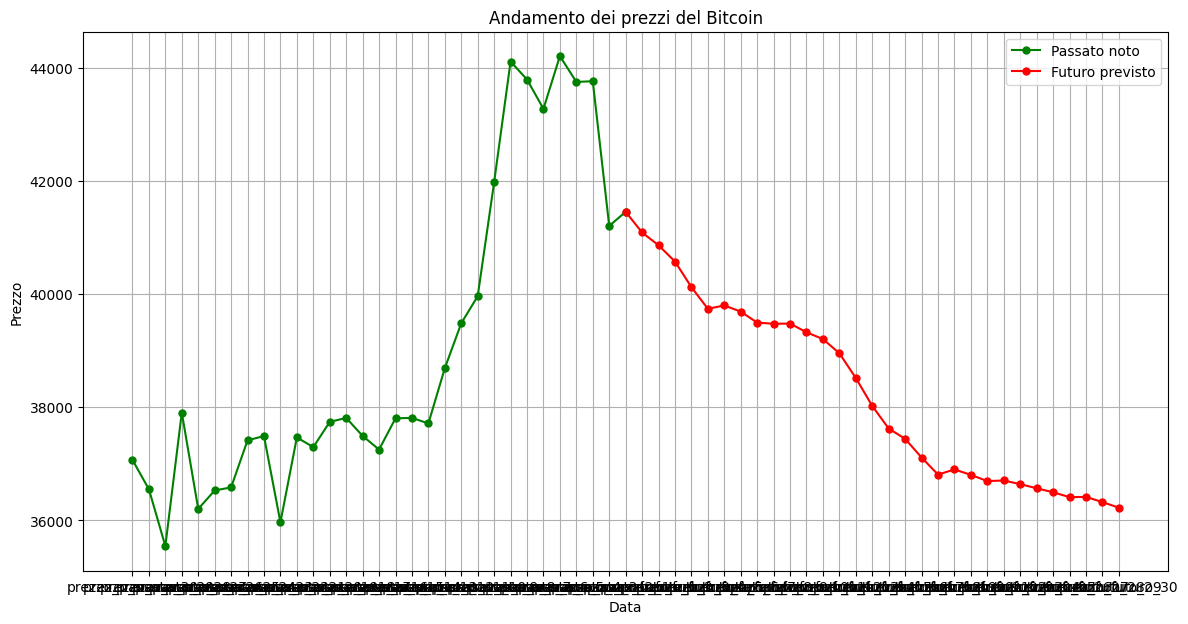

In [194]:
valori = input_data.T[::-1]

# Definisci i punti di divisione
passato = sum('passato' in column for column in input_data.columns)

# Crea il grafico
plt.figure(figsize=(14, 7))

# Plotta i primi passato valori in verde
plt.plot(valori[:passato+1], color='green', marker='o', markersize=5, linestyle='-')

# Plotta i restanti valori in rosso
plt.plot(valori[passato:], color='red', marker='o', markersize=5, linestyle='-')
# plt.plot(df['Timestamp'], df['Price'], label=f"Prezzo Bitcoin dal {str(df['Timestamp'].iloc[0])} al {str(df['Timestamp'].iloc[-1])}", color='blue')

# Personalizza il grafico
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend(["Passato noto", "Futuro previsto"])
plt.grid(True)

# Mostra il grafico
plt.show()

### Previsione dati futuri usando modelli a più output

In [195]:
def trova_modello(numero_cartella_scelta, numero_modello_scelto, percorso_modelli, formato):
    # Verifico che il percorso esista
    if not os.path.exists(percorso_modelli):
        print(f"Il percorso {percorso_modelli} non esiste.")
        return None

    # Itero attraverso tutte le cartelle e sottocartelle nel percorso
    for root, dirs, files in os.walk(percorso_modelli):
        for file in files:
            if file.startswith(str(numero_modello_scelto)) and file.endswith(formato) and root.split("\\")[-2].split(" - ")[0] == str(numero_cartella_scelta):
                # Restituisco il percorso completo del file trovato
                return os.path.join(root, file)

    # Se nessun file è stato trovato
    print(f"Nessun file {formato} trovato per il numero {numero_modello_scelto} nel percorso {percorso_modelli}.")
    return None

In [196]:
numero_cartella_scelta = 28

In [197]:
numero_modello_scelto = 1

In [198]:
percorso_modelli = r"C:\Users\Alessandro\Desktop\Cartelle\Mie\Programmi personali in Python\Kaggle\Bitcoin Historical Dataset\Modelli\Reti neurali"

In [199]:
percorso_modello_scelto = trova_modello(numero_cartella_scelta, numero_modello_scelto, percorso_modelli, formato=".h5")
percorso_modello_scelto

'C:\\Users\\Alessandro\\Desktop\\Cartelle\\Mie\\Programmi personali in Python\\Kaggle\\Bitcoin Historical Dataset\\Modelli\\Reti neurali\\28 - Modelli con reti neurali 29-12-2023_10-12-15 (7_futuri_zoom_25_6)\\MAE\\1 - MAE1740.212, L7, mV-10, MV10, P1, AHrelu, AOlinear, BS140, ME100000, MOval_mape, PA1500, OPadam, LOmae, METmape, SV42 (29-12-2023_11-50-29).h5'

In [200]:
modello_scelto = load_model(percorso_modello_scelto)

In [201]:
modello_scelto.layers[1].get_weights()

[array([[ 7.206229  , -1.9840616 ,  9.618604  , -3.864033  ,  7.5408783 ,
         -3.8044007 , -7.576243  ],
        [-7.344836  , -1.1592065 , -3.6627285 ,  2.1883087 , -5.507048  ,
         -7.224085  ,  6.759654  ],
        [ 1.7221375 ,  7.881893  , -6.6048884 , -2.8975773 ,  7.8032284 ,
          4.2120857 , -1.9206543 ],
        [ 7.3948507 ,  8.006764  , -7.28439   , -0.74846995, -8.3969345 ,
          3.3407223 ,  0.78398025],
        [ 5.3292117 , -4.125055  ,  5.566249  ,  5.94755   ,  0.5579864 ,
          6.85059   ,  6.6838274 ],
        [ 0.04922175,  0.04932776,  0.04901197,  0.04972279,  0.0494677 ,
          0.04915011,  0.04971109],
        [ 8.545658  ,  1.6162891 ,  8.502148  ,  3.6746998 ,  3.6536293 ,
          9.341099  ,  3.8225126 ]], dtype=float32),
 array([7.241025 , 6.253025 , 6.994871 , 4.7842507, 5.1122084, 5.738091 ,
        6.6366   ], dtype=float32)]

In [202]:
modello_scelto.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)                 │        224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 7)                 │         56 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 282 (1.11 KB)

 Trainable params: 280 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [203]:
df_31_giorni

,Timestamp,Price
0,2023-11-13,37067.696982
1,2023-11-14,36549.162048
2,2023-11-15,35545.201433
3,2023-11-16,37903.662452
4,2023-11-17,36201.516111
5,2023-11-18,36527.760225
6,2023-11-19,36582.368442
7,2023-11-20,37413.994608
8,2023-11-21,37489.298471
9,2023-11-22,35965.360361


In [204]:
df_31_giorni = df_31_giorni.reset_index(drop=True)

In [205]:
df_31_giorni

,Timestamp,Price
0,2023-11-13,37067.696982
1,2023-11-14,36549.162048
2,2023-11-15,35545.201433
3,2023-11-16,37903.662452
4,2023-11-17,36201.516111
5,2023-11-18,36527.760225
6,2023-11-19,36582.368442
7,2023-11-20,37413.994608
8,2023-11-21,37489.298471
9,2023-11-22,35965.360361


In [206]:
# Trasformo il dataframe in un dataframe con 1 sola riga

numero_giorni = 30

df_input = pd.DataFrame({'prezzo_presente': [df_31_giorni['Price'].iloc[numero_giorni]]})

# Aggiunta delle colonne con i nomi desiderati
for i in range(0, numero_giorni):
    col_name = f"prezzo_passato_{i+1}"
    df_input[col_name] = [df_31_giorni['Price'].iloc[numero_giorni - i - 1]]

df_input

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,41450.819387,41200.962726,43757.959938,43745.491992,44202.176109,43270.11956,43788.288808,44105.944773,41974.331773,39960.27542,...,35965.360361,37489.298471,37413.994608,36582.368442,36527.760225,36201.516111,37903.662452,35545.201433,36549.162048,37067.696982


In [207]:
# Riadatto le colonne in modo che siano nello stesso ordine in cui erano durante l'allenamento di questo modello
df_input_riadattato = df_input #[['prezzo_passato_27', 'prezzo_passato_20', 'prezzo_passato_21', 'prezzo_passato_22', 'prezzo_passato_23', 'prezzo_passato_24', 'prezzo_passato_25', 'prezzo_passato_26', 'prezzo_passato_28', 'prezzo_presente', 'prezzo_passato_29', 'prezzo_passato_30', 'prezzo_passato_19', 'prezzo_passato_18', 'prezzo_passato_17', 'prezzo_passato_16', 'prezzo_passato_1', 'prezzo_passato_2', 'prezzo_passato_3', 'prezzo_passato_4', 'prezzo_passato_5', 'prezzo_passato_6', 'prezzo_passato_7', 'prezzo_passato_8', 'prezzo_passato_9', 'prezzo_passato_10', 'prezzo_passato_11', 'prezzo_passato_12', 'prezzo_passato_13', 'prezzo_passato_14', 'prezzo_passato_15']]

In [208]:
df_input_riadattato

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,41450.819387,41200.962726,43757.959938,43745.491992,44202.176109,43270.11956,43788.288808,44105.944773,41974.331773,39960.27542,...,35965.360361,37489.298471,37413.994608,36582.368442,36527.760225,36201.516111,37903.662452,35545.201433,36549.162048,37067.696982


In [209]:
previsioni_totali_modello_scelto = modello_scelto.predict(df_input_riadattato)
previsioni_totali_modello_scelto

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[41746.082, 41834.99 , 41567.95 , 42168.5  , 41952.51 , 41683.83 ,
        42160.43 ]], dtype=float32)

In [210]:
passato

30

In [211]:
futuro

7

In [212]:
tempo_futuro = [df_31_giorni['Timestamp'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, futuro + 1)]
tempo_futuro

[Timestamp('2023-12-14 00:00:00'),
 Timestamp('2023-12-15 00:00:00'),
 Timestamp('2023-12-16 00:00:00'),
 Timestamp('2023-12-17 00:00:00'),
 Timestamp('2023-12-18 00:00:00'),
 Timestamp('2023-12-19 00:00:00'),
 Timestamp('2023-12-20 00:00:00')]

In [213]:
df_futuro = pd.DataFrame({'Timestamp': tempo_futuro, 'Price': [previsioni_totali_modello_scelto[0]][0]})
df_futuro

,Timestamp,Price
0,2023-12-14,41746.082031
1,2023-12-15,41834.988281
2,2023-12-16,41567.949219
3,2023-12-17,42168.500000
4,2023-12-18,41952.511719
5,2023-12-19,41683.828125
6,2023-12-20,42160.429688


In [214]:
df_passato_e_futuro = pd.concat([df_31_giorni, df_futuro]).reset_index(drop=True)
df_passato_e_futuro

,Timestamp,Price
0,2023-11-13,37067.696982
1,2023-11-14,36549.162048
2,2023-11-15,35545.201433
3,2023-11-16,37903.662452
4,2023-11-17,36201.516111
5,2023-11-18,36527.760225
6,2023-11-19,36582.368442
7,2023-11-20,37413.994608
8,2023-11-21,37489.298471
9,2023-11-22,35965.360361


In [215]:
# Ricavo i valori dei dati futuri veri se già noti
data0 = datetime(1970, 1, 1, 0, 0, 0)
ultimo_futuro = df_passato_e_futuro['Timestamp'].iloc[-1]
data1_bis = ultimo_futuro - pd.Timedelta(days=360) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1_bis - data0).total_seconds()))
secondi_fine = str(int((ultimo_futuro - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data_bis = response.json()

# Preprocess the data
prices_bis = data_bis['prices']
timestamps_bis = [x[0] for x in prices_bis]
values_bis = [x[1] for x in prices_bis]

# Convert the preprocessed data into a DataFrame
df_futuro_vero = pd.DataFrame({'Timestamp': timestamps_bis, 'Price': values_bis})

# Convert the timestamps to a readable format
df_futuro_vero['Timestamp'] = pd.to_datetime(df_futuro_vero['Timestamp'], unit='ms')

df_futuro_vero = df_futuro_vero[-futuro-1:]

In [216]:
df_futuro_vero

,Timestamp,Price
353,2023-12-13,41450.819387
354,2023-12-14,42931.761826
355,2023-12-15,43009.595456
356,2023-12-16,41992.014187
357,2023-12-17,42247.067882
358,2023-12-18,41410.819635
359,2023-12-19,42684.182555
360,2023-12-20,42250.206183


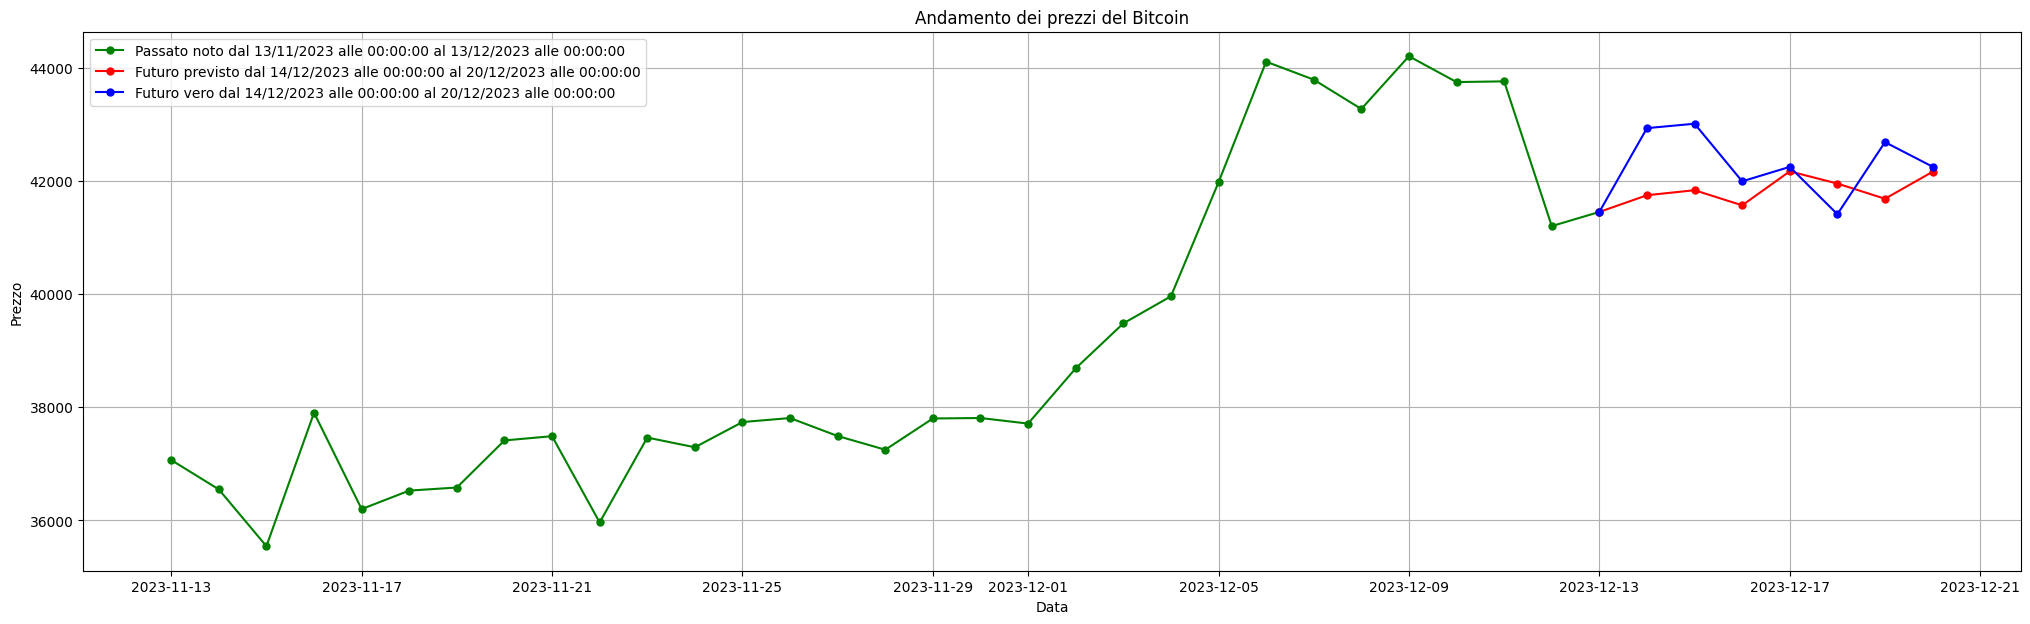

In [217]:
valori_generici = df_input_riadattato.T[::-1]

# Definisci i punti di divisione
passato = sum('passato' in column for column in input_data.columns)

# Crea il grafico
plt.figure(figsize=(25, 7))

# Plotta i primi passato valori in verde
plt.plot(df_passato_e_futuro['Timestamp'][:passato+1], df_passato_e_futuro['Price'][:passato+1], color='green', marker='o', markersize=5, linestyle='-')

# Plotta i restanti valori in rosso
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_passato_e_futuro['Price'][passato:], color='red', marker='o', markersize=5, linestyle='-')

# Plotto i valori futuri veri se già noti
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_futuro_vero['Price'], color='blue', marker='o', markersize=5, linestyle='-')

# Personalizza il grafico
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend([f"Passato noto dal {str(df_31_giorni['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_31_giorni['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro previsto dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro vero dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}"])
plt.grid(True)

# Mostra il grafico
plt.show()

In [218]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
print(mean_absolute_percentage_error(df_passato_e_futuro['Price'][passato:], df_futuro_vero['Price']), mean_absolute_error(df_passato_e_futuro['Price'][passato:], df_futuro_vero['Price']))

0.013448037708081867 561.8428536572083


<h6> Previsione dati futuri a partire dal giorno odierno </h6>

In [219]:
datetime.now().year

2024

In [220]:
# Ricavo i valori degli ultimi 30 giorni a partire dal giorno di oggi
data0 = datetime(1970, 1, 1, 0, 0, 0)
ultimo_futuro = datetime(datetime.now().year, datetime.now().month, datetime.now().day, 0, 0, 0)
data1_bis = ultimo_futuro - pd.Timedelta(days=360) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1_bis - data0).total_seconds()))
secondi_fine = str(int((ultimo_futuro - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data_bis = response.json()

# Preprocess the data
prices_bis = data_bis['prices']
timestamps_bis = [x[0] for x in prices_bis]
values_bis = [x[1] for x in prices_bis]

# Convert the preprocessed data into a DataFrame
ultimi_31_giorni = pd.DataFrame({'Timestamp': timestamps_bis, 'Price': values_bis})

# Convert the timestamps to a readable format
ultimi_31_giorni['Timestamp'] = pd.to_datetime(ultimi_31_giorni['Timestamp'], unit='ms')

ultimi_31_giorni = ultimi_31_giorni[-31:]

In [221]:
ultimi_31_giorni

,Timestamp,Price
330,2023-12-29,42600.650633
331,2023-12-30,42074.707156
332,2023-12-31,42220.611401
333,2024-01-01,42208.202176
334,2024-01-02,44168.681187
335,2024-01-03,44994.673887
336,2024-01-04,42821.558989
337,2024-01-05,44195.578562
338,2024-01-06,44113.699734
339,2024-01-07,43956.120717


In [222]:
def trova_modello(numero_cartella_scelta, numero_modello_scelto, percorso_modelli, formato):
    # Verifico che il percorso esista
    if not os.path.exists(percorso_modelli):
        print(f"Il percorso {percorso_modelli} non esiste.")
        return None

    # Itero attraverso tutte le cartelle e sottocartelle nel percorso
    for root, dirs, files in os.walk(percorso_modelli):
        for file in files:
            if file.startswith(str(numero_modello_scelto)) and file.endswith(formato) and root.split("\\")[-2].split(" - ")[0] == str(numero_cartella_scelta):
                # Restituisco il percorso completo del file trovato
                return os.path.join(root, file)

    # Se nessun file è stato trovato
    print(f"Nessun file {formato} trovato per il numero {numero_modello_scelto} nel percorso {percorso_modelli}.")
    return None

In [223]:
numero_cartella_scelta = 28

In [224]:
numero_modello_scelto = 1

In [225]:
percorso_modelli = r"C:\Users\Alessandro\Desktop\Cartelle\Mie\Programmi personali in Python\Kaggle\Bitcoin Historical Dataset\Modelli\Reti neurali"

In [226]:
percorso_modello_scelto = trova_modello(numero_cartella_scelta, numero_modello_scelto, percorso_modelli, formato=".h5")
percorso_modello_scelto

'C:\\Users\\Alessandro\\Desktop\\Cartelle\\Mie\\Programmi personali in Python\\Kaggle\\Bitcoin Historical Dataset\\Modelli\\Reti neurali\\28 - Modelli con reti neurali 29-12-2023_10-12-15 (7_futuri_zoom_25_6)\\MAE\\1 - MAE1740.212, L7, mV-10, MV10, P1, AHrelu, AOlinear, BS140, ME100000, MOval_mape, PA1500, OPadam, LOmae, METmape, SV42 (29-12-2023_11-50-29).h5'

In [227]:
modello_scelto = load_model(percorso_modello_scelto)

In [228]:
# Trasformo il dataframe in un dataframe con 1 sola riga

numero_giorni = 30

df_input = pd.DataFrame({'prezzo_presente': [ultimi_31_giorni['Price'].iloc[numero_giorni]]})

# Aggiunta delle colonne con i nomi desiderati
for i in range(0, numero_giorni):
    col_name = f"prezzo_passato_{i+1}"
    df_input[col_name] = [ultimi_31_giorni['Price'].iloc[numero_giorni - i - 1]]

df_input

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,42119.610495,41862.935611,39938.286442,40123.671058,39833.454105,39504.730058,41541.899457,41626.10711,41600.940933,41261.394798,...,43956.120717,44113.699734,44195.578562,42821.558989,44994.673887,44168.681187,42208.202176,42220.611401,42074.707156,42600.650633


In [229]:
previsioni_totali_modello_scelto = modello_scelto.predict(df_input)
previsioni_totali_modello_scelto

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[42217.473, 42307.395, 42037.33 , 42644.688, 42426.258, 42154.535,
        42636.508]], dtype=float32)

In [230]:
passato

30

In [231]:
futuro

7

In [232]:
tempo_futuro = [ultimi_31_giorni['Timestamp'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, futuro + 1)]
tempo_futuro

[Timestamp('2024-01-29 00:00:00'),
 Timestamp('2024-01-30 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-02-02 00:00:00'),
 Timestamp('2024-02-03 00:00:00'),
 Timestamp('2024-02-04 00:00:00')]

In [233]:
df_futuro = pd.DataFrame({'Timestamp': tempo_futuro, 'Price': [previsioni_totali_modello_scelto[0]][0]})
df_futuro

,Timestamp,Price
0,2024-01-29,42217.472656
1,2024-01-30,42307.394531
2,2024-01-31,42037.328125
3,2024-02-01,42644.687500
4,2024-02-02,42426.257812
5,2024-02-03,42154.535156
6,2024-02-04,42636.507812


In [234]:
df_passato_e_futuro = pd.concat([ultimi_31_giorni, df_futuro]).reset_index(drop=True)
df_passato_e_futuro

,Timestamp,Price
0,2023-12-29,42600.650633
1,2023-12-30,42074.707156
2,2023-12-31,42220.611401
3,2024-01-01,42208.202176
4,2024-01-02,44168.681187
5,2024-01-03,44994.673887
6,2024-01-04,42821.558989
7,2024-01-05,44195.578562
8,2024-01-06,44113.699734
9,2024-01-07,43956.120717


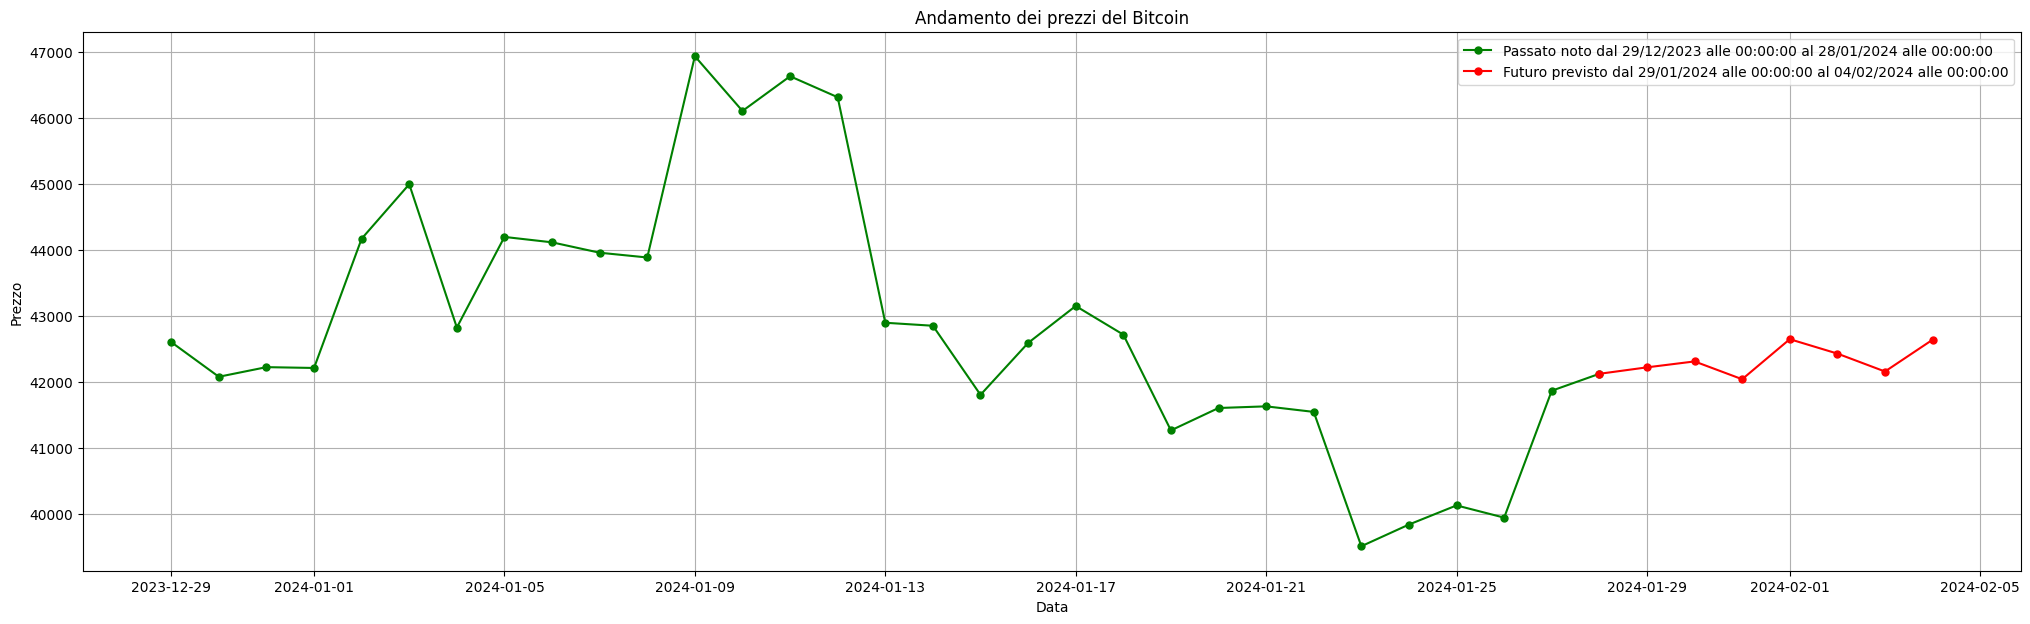

In [235]:
valori_generici = df_input_riadattato.T[::-1]

# Definisci i punti di divisione
passato = sum('passato' in column for column in input_data.columns)

# Crea il grafico
plt.figure(figsize=(25, 7))

# Plotta i primi passato valori in verde
plt.plot(df_passato_e_futuro['Timestamp'][:passato+1], df_passato_e_futuro['Price'][:passato+1], color='green', marker='o', markersize=5, linestyle='-')

# Plotta i restanti valori in rosso
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_passato_e_futuro['Price'][passato:], color='red', marker='o', markersize=5, linestyle='-')

# Personalizza il grafico
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend([f"Passato noto dal {str(ultimi_31_giorni['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(ultimi_31_giorni['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro previsto dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}"])
plt.grid(True)

# Mostra il grafico
plt.show()

<h6> Scarico un generico dataset con i 31 giorni di un pediodo scelto in input e confronto le previsioni del modello con la realtà </h6>

In [5]:
data0 = datetime(1970, 1, 1, 0, 0, 0)
data2 = datetime(2024, 1, 18, 0, 0, 0)
data1 = data2 - pd.Timedelta(days=1800) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1 - data0).total_seconds()))
secondi_fine = str(int((data2 - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data = response.json()

# Preprocess the data
prices = data['prices']
timestamps = [x[0] for x in prices]
values = [x[1] for x in prices]

# Convert the preprocessed data into a DataFrame
df_generico = pd.DataFrame({'Timestamp': timestamps, 'Price': values})

# Convert the timestamps to a readable format
df_generico['Timestamp'] = pd.to_datetime(df_generico['Timestamp'], unit='ms')

In [6]:
df_generico

,Timestamp,Price
0,2019-02-13,3633.965047
1,2019-02-14,3610.062273
2,2019-02-15,3589.661830
3,2019-02-16,3601.229191
4,2019-02-17,3622.591653
...,...,...
1796,2024-01-14,42848.474516
1797,2024-01-15,41800.932822
1798,2024-01-16,42587.336038
1799,2024-01-17,43148.001643


In [7]:
df_generico = df_generico.iloc[-1501:]
df_generico = df_generico.reset_index(drop=True)
df_generico

,Timestamp,Price
0,2019-12-10,7347.036951
1,2019-12-11,7233.950487
2,2019-12-12,7197.426826
3,2019-12-13,7200.707018
4,2019-12-14,7247.350277
...,...,...
1496,2024-01-14,42848.474516
1497,2024-01-15,41800.932822
1498,2024-01-16,42587.336038
1499,2024-01-17,43148.001643


In [8]:
# Trasformo il dataframe in un dataframe con 1 sola riga

numero_giorni = 1500

df_generico_input = pd.DataFrame({'prezzo_presente': [df_generico['Price'].iloc[numero_giorni]]})

# Aggiunta delle colonne con i nomi desiderati
for i in range(0, numero_giorni):
    col_name = f"prezzo_passato_{i+1}"
    df_generico_input[col_name] = [df_generico['Price'].iloc[numero_giorni - i - 1]]

df_generico_input

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19900\3603443173.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generico_input[col_name] = [df_generico['Price'].iloc[numero_giorni - i - 1]]
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19900\3603443173.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_generico_input[col_name] = [df_generico['Price'].iloc[numero_giorni - i - 1]]
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19900\3603443173.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is 

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_1491,prezzo_passato_1492,prezzo_passato_1493,prezzo_passato_1494,prezzo_passato_1495,prezzo_passato_1496,prezzo_passato_1497,prezzo_passato_1498,prezzo_passato_1499,prezzo_passato_1500
0,42713.859187,43148.001643,42587.336038,41800.932822,42848.474516,42893.929606,46314.355542,46632.313148,46105.946078,46936.185561,...,7274.768504,6627.162515,6901.036915,7108.563022,7081.740255,7247.350277,7200.707018,7197.426826,7233.950487,7347.036951


In [11]:
previsioni_totali_generiche_modello_scelto = modello_scelto.predict(df_generico_input)
previsioni_totali_generiche_modello_scelto

AttributeError: 'list' object has no attribute 'predict'

In [293]:
passato

30

In [294]:
futuro

7

In [295]:
tempo_futuro = [df_generico['Timestamp'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, futuro + 1)]
tempo_futuro

[Timestamp('2024-01-19 00:00:00'),
 Timestamp('2024-01-20 00:00:00'),
 Timestamp('2024-01-21 00:00:00'),
 Timestamp('2024-01-22 00:00:00'),
 Timestamp('2024-01-23 00:00:00'),
 Timestamp('2024-01-24 00:00:00'),
 Timestamp('2024-01-25 00:00:00')]

In [297]:
df_futuro = pd.DataFrame({'Timestamp': tempo_futuro, 'Price': [previsioni_totali_generiche_modello_scelto[0]][0]})
df_futuro

,Timestamp,Price
0,2024-01-19,43098.105469
1,2024-01-20,43189.925781
2,2024-01-21,42914.207031
3,2024-01-22,43534.285156
4,2024-01-23,43311.289062
5,2024-01-24,43033.886719
6,2024-01-25,43525.894531


In [298]:
df_passato_e_futuro = pd.concat([df_generico, df_futuro]).reset_index(drop=True)
df_passato_e_futuro

,Timestamp,Price
0,2023-12-19,42684.182555
1,2023-12-20,42250.206183
2,2023-12-21,43634.124168
3,2023-12-22,43849.699599
4,2023-12-23,44003.696022
5,2023-12-24,43752.030885
6,2023-12-25,43034.971063
7,2023-12-26,43638.236302
8,2023-12-27,42516.426940
9,2023-12-28,43418.467775


In [299]:
# Ricavo i valori dei dati futuri veri se già noti
data0 = datetime(1970, 1, 1, 0, 0, 0)
ultimo_futuro = df_passato_e_futuro['Timestamp'].iloc[-1]
data1_bis = ultimo_futuro - pd.Timedelta(days=360) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1_bis - data0).total_seconds()))
secondi_fine = str(int((ultimo_futuro - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data_bis = response.json()

# Preprocess the data
prices_bis = data_bis['prices']
timestamps_bis = [x[0] for x in prices_bis]
values_bis = [x[1] for x in prices_bis]

# Convert the preprocessed data into a DataFrame
df_futuro_vero = pd.DataFrame({'Timestamp': timestamps_bis, 'Price': values_bis})

# Convert the timestamps to a readable format
df_futuro_vero['Timestamp'] = pd.to_datetime(df_futuro_vero['Timestamp'], unit='ms')

df_futuro_vero = df_futuro_vero[-futuro-1:]

In [300]:
df_futuro_vero

,Timestamp,Price
353,2024-01-18,42713.859187
354,2024-01-19,41261.394798
355,2024-01-20,41600.940933
356,2024-01-21,41626.107110
357,2024-01-22,41541.899457
358,2024-01-23,39504.730058
359,2024-01-24,39833.454105
360,2024-01-25,40123.671058


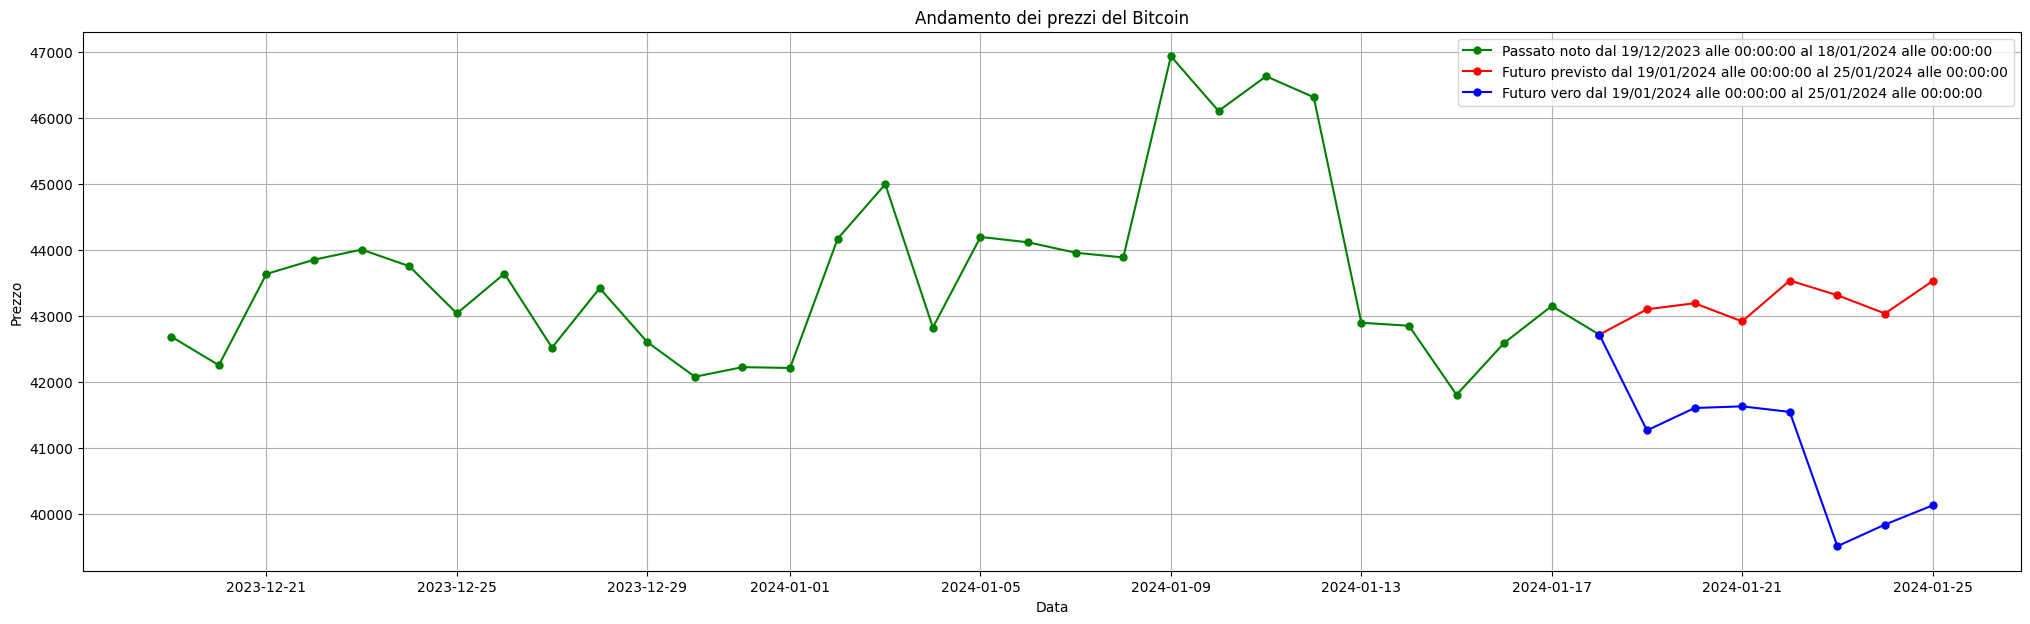

In [301]:
valori_generici = df_input_riadattato.T[::-1]

# Definisci i punti di divisione
passato = sum('passato' in column for column in input_data.columns)

# Crea il grafico
plt.figure(figsize=(25, 7))

# Plotta i primi passato valori in verde
plt.plot(df_passato_e_futuro['Timestamp'][:passato+1], df_passato_e_futuro['Price'][:passato+1], color='green', marker='o', markersize=5, linestyle='-')

# Plotta i restanti valori in rosso
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_passato_e_futuro['Price'][passato:], color='red', marker='o', markersize=5, linestyle='-')

# Plotto i valori futuri veri se già noti
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_futuro_vero['Price'], color='blue', marker='o', markersize=5, linestyle='-')

# Personalizza il grafico
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend([f"Passato noto dal {str(df_generico['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_generico['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro previsto dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro vero dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}"])
plt.grid(True)

# Mostra il grafico
plt.show()

In [302]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
print(mean_absolute_percentage_error(df_passato_e_futuro['Price'][passato:], df_futuro_vero['Price']), mean_absolute_error(df_passato_e_futuro['Price'][passato:], df_futuro_vero['Price']))

0.04945164307886571 2139.4245289091587


### Previsioni con regressione lineare con confronto tra previsioni e dati veri (con dataset generico scelto sopra)

In [15]:
import joblib
modello_scelto_rl = joblib.load('modello 1500.h5')

In [16]:
modello_scelto_rl[0].coef_

array([ 1.41958513e-12,  1.00323798e+00, -2.41475906e-02, ...,
       -4.47095130e-01, -2.91271611e-01,  2.70494843e-01])

In [17]:
modello_scelto_rl[0].predict(df_input)

c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1501 features, but LinearRegression is expecting 1502 features as input.

In [310]:
df_generico

,Timestamp,Price
0,2023-12-19,42684.182555
1,2023-12-20,42250.206183
2,2023-12-21,43634.124168
3,2023-12-22,43849.699599
4,2023-12-23,44003.696022
5,2023-12-24,43752.030885
6,2023-12-25,43034.971063
7,2023-12-26,43638.236302
8,2023-12-27,42516.426940
9,2023-12-28,43418.467775


In [311]:
# Trasformo il dataframe in un dataframe con 1 sola riga

numero_giorni = 30

df_input = pd.DataFrame({'prezzo_presente': [df_generico['Price'].iloc[numero_giorni]]})

# Aggiunta delle colonne con i nomi desiderati
for i in range(0, numero_giorni):
    col_name = f"prezzo_passato_{i+1}"
    df_input[col_name] = [df_generico['Price'].iloc[numero_giorni - i - 1]]

df_input

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,42713.859187,43148.001643,42587.336038,41800.932822,42848.474516,42893.929606,46314.355542,46632.313148,46105.946078,46936.185561,...,43418.467775,42516.42694,43638.236302,43034.971063,43752.030885,44003.696022,43849.699599,43634.124168,42250.206183,42684.182555


In [312]:
# Riadatto le colonne in modo che siano nello stesso ordine in cui erano durante l'allenamento di questo modello
df_input_riadattato = df_input #[['prezzo_passato_27', 'prezzo_passato_20', 'prezzo_passato_21', 'prezzo_passato_22', 'prezzo_passato_23', 'prezzo_passato_24', 'prezzo_passato_25', 'prezzo_passato_26', 'prezzo_passato_28', 'prezzo_presente', 'prezzo_passato_29', 'prezzo_passato_30', 'prezzo_passato_19', 'prezzo_passato_18', 'prezzo_passato_17', 'prezzo_passato_16', 'prezzo_passato_1', 'prezzo_passato_2', 'prezzo_passato_3', 'prezzo_passato_4', 'prezzo_passato_5', 'prezzo_passato_6', 'prezzo_passato_7', 'prezzo_passato_8', 'prezzo_passato_9', 'prezzo_passato_10', 'prezzo_passato_11', 'prezzo_passato_12', 'prezzo_passato_13', 'prezzo_passato_14', 'prezzo_passato_15']]

In [313]:
df_input_riadattato

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,42713.859187,43148.001643,42587.336038,41800.932822,42848.474516,42893.929606,46314.355542,46632.313148,46105.946078,46936.185561,...,43418.467775,42516.42694,43638.236302,43034.971063,43752.030885,44003.696022,43849.699599,43634.124168,42250.206183,42684.182555


In [322]:
import numpy as np
previsioni_totali_modello_scelto_rl = np.array([modello_scelto_rl[i].predict(df_input_riadattato) for i in range(len(modello_scelto_rl))])
previsioni_totali_modello_scelto_rl

array([[43184.22926077],
       [43218.91504878],
       [43301.43107675],
       [43421.9280733 ],
       [43156.21420029],
       [42680.55204384],
       [43010.21679017]])

In [316]:
type(previsioni_totali_modello_scelto[0][0])

numpy.float32

In [317]:
type(previsioni_totali_modello_scelto_rl[0][0])

numpy.float64

In [329]:
df_futuro = pd.DataFrame({'Timestamp': tempo_futuro, 'Price': [previsioni_totali_modello_scelto_rl[i][0] for i in range(len(modello_scelto_rl))]})
df_futuro

,Timestamp,Price
0,2024-01-19,43184.229261
1,2024-01-20,43218.915049
2,2024-01-21,43301.431077
3,2024-01-22,43421.928073
4,2024-01-23,43156.214200
5,2024-01-24,42680.552044
6,2024-01-25,43010.216790


In [330]:
previsioni_totali_modello_scelto_rl

array([[43184.22926077],
       [43218.91504878],
       [43301.43107675],
       [43421.9280733 ],
       [43156.21420029],
       [42680.55204384],
       [43010.21679017]])

In [323]:
passato

30

In [324]:
futuro

7

In [331]:
tempo_futuro = [df_generico['Timestamp'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, futuro +1)]
tempo_futuro

[Timestamp('2024-01-19 00:00:00'),
 Timestamp('2024-01-20 00:00:00'),
 Timestamp('2024-01-21 00:00:00'),
 Timestamp('2024-01-22 00:00:00'),
 Timestamp('2024-01-23 00:00:00'),
 Timestamp('2024-01-24 00:00:00'),
 Timestamp('2024-01-25 00:00:00')]

In [332]:
df_passato_e_futuro = pd.concat([df_generico, df_futuro]).reset_index(drop=True)
df_passato_e_futuro

,Timestamp,Price
0,2023-12-19,42684.182555
1,2023-12-20,42250.206183
2,2023-12-21,43634.124168
3,2023-12-22,43849.699599
4,2023-12-23,44003.696022
5,2023-12-24,43752.030885
6,2023-12-25,43034.971063
7,2023-12-26,43638.236302
8,2023-12-27,42516.426940
9,2023-12-28,43418.467775


In [333]:
# Ricavo i valori dei dati futuri veri se già noti
data0 = datetime(1970, 1, 1, 0, 0, 0)
ultimo_futuro = df_passato_e_futuro['Timestamp'].iloc[-1]
data1_bis = ultimo_futuro - pd.Timedelta(days=360) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1_bis - data0).total_seconds()))
secondi_fine = str(int((ultimo_futuro - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data_bis = response.json()

# Preprocess the data
prices_bis = data_bis['prices']
timestamps_bis = [x[0] for x in prices_bis]
values_bis = [x[1] for x in prices_bis]

# Convert the preprocessed data into a DataFrame
df_futuro_vero = pd.DataFrame({'Timestamp': timestamps_bis, 'Price': values_bis})

# Convert the timestamps to a readable format
df_futuro_vero['Timestamp'] = pd.to_datetime(df_futuro_vero['Timestamp'], unit='ms')

df_futuro_vero = df_futuro_vero[-futuro-1:]

In [334]:
df_futuro_vero

,Timestamp,Price
353,2024-01-18,42713.859187
354,2024-01-19,41261.394798
355,2024-01-20,41600.940933
356,2024-01-21,41626.107110
357,2024-01-22,41541.899457
358,2024-01-23,39504.730058
359,2024-01-24,39833.454105
360,2024-01-25,40123.671058


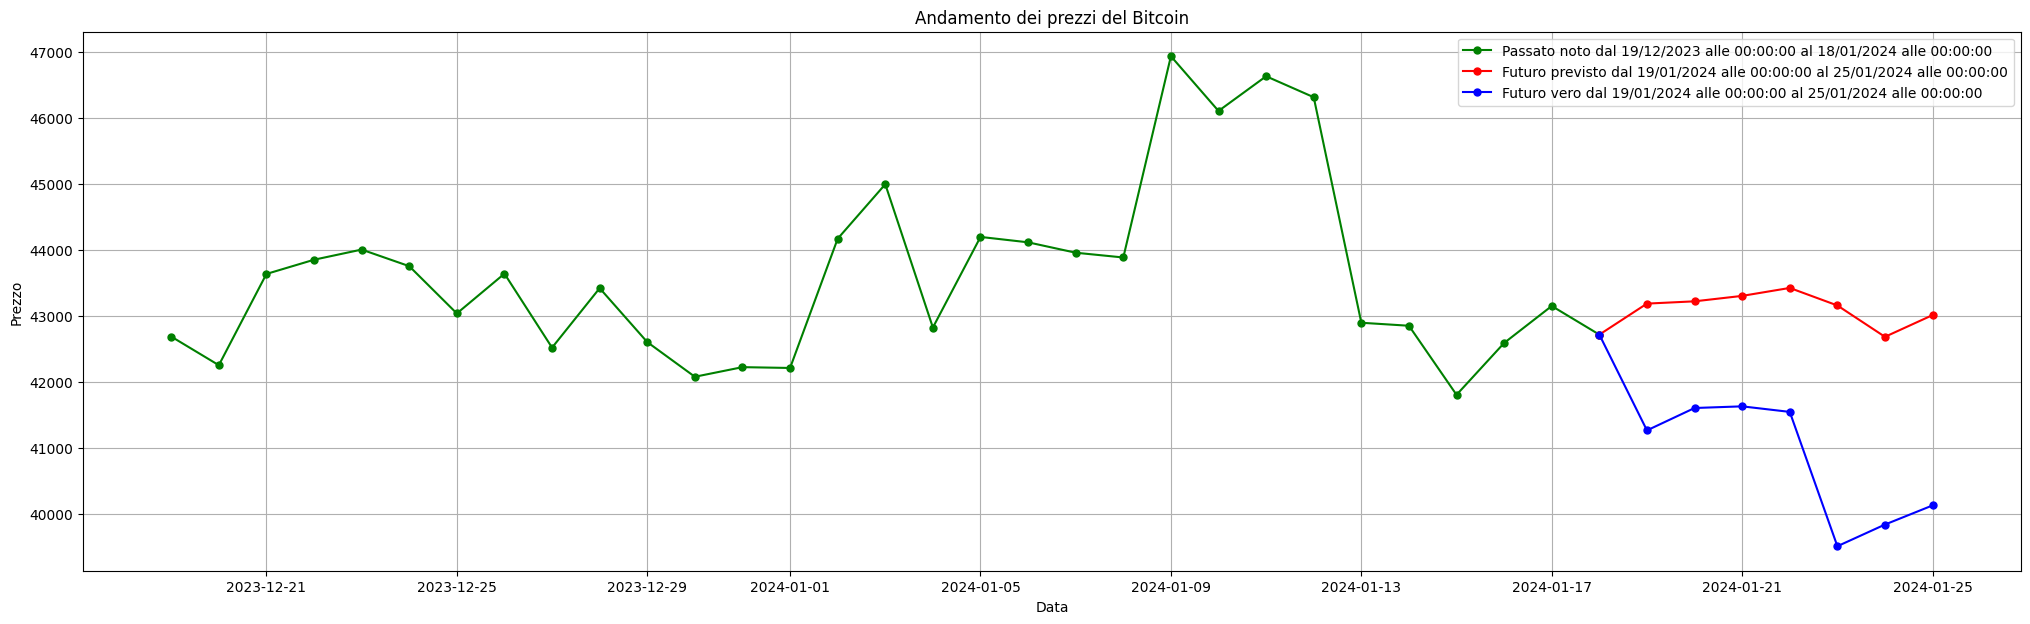

In [335]:
valori_generici = df_input_riadattato.T[::-1]

# Definisci i punti di divisione
passato = sum('passato' in column for column in input_data.columns)

# Crea il grafico
plt.figure(figsize=(25, 7))

# Plotta i primi passato valori in verde
plt.plot(df_passato_e_futuro['Timestamp'][:passato+1], df_passato_e_futuro['Price'][:passato+1], color='green', marker='o', markersize=5, linestyle='-')

# Plotta i restanti valori in rosso
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_passato_e_futuro['Price'][passato:], color='red', marker='o', markersize=5, linestyle='-')

# Plotto i valori futuri veri se già noti
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_futuro_vero['Price'], color='blue', marker='o', markersize=5, linestyle='-')

# Personalizza il grafico
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend([f"Passato noto dal {str(df_generico['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_generico['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro previsto dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro vero dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}"])
plt.grid(True)

# Mostra il grafico
plt.show()

In [336]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
print(mean_absolute_percentage_error(df_passato_e_futuro['Price'][passato:], df_futuro_vero['Price']), mean_absolute_error(df_passato_e_futuro['Price'][passato:], df_futuro_vero['Price']))

0.04779757675854598 2060.161121896341


### Previsione con regressione lineare del futuro attuale

In [261]:
# Ricavo i valori degli ultimi 30 giorni a partire dal giorno di oggi
data0 = datetime(1970, 1, 1, 0, 0, 0)
ultimo_futuro = datetime(datetime.now().year, datetime.now().month, datetime.now().day, 0, 0, 0)
data1_bis = ultimo_futuro - pd.Timedelta(days=360) # Per prendere 30 giorni, devo considerare un periodo più lungo e poi tenere solo gli ultimi 30 giorni, altrimenti mi usa per default una granularità diversa da 1 giorno

secondi_inizio = str(int((data1_bis - data0).total_seconds()))
secondi_fine = str(int((ultimo_futuro - data0).total_seconds()))
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {'vs_currency': 'usd', 'from': secondi_inizio, 'to': secondi_fine} # Periodo data1 - data2



response = requests.get(url, params=params)
data_bis = response.json()

# Preprocess the data
prices_bis = data_bis['prices']
timestamps_bis = [x[0] for x in prices_bis]
values_bis = [x[1] for x in prices_bis]

# Convert the preprocessed data into a DataFrame
ultimi_31_giorni = pd.DataFrame({'Timestamp': timestamps_bis, 'Price': values_bis})

# Convert the timestamps to a readable format
ultimi_31_giorni['Timestamp'] = pd.to_datetime(ultimi_31_giorni['Timestamp'], unit='ms')

ultimi_31_giorni = ultimi_31_giorni[-31:]

In [262]:
ultimi_31_giorni

,Timestamp,Price
330,2023-12-29,42600.650633
331,2023-12-30,42074.707156
332,2023-12-31,42220.611401
333,2024-01-01,42208.202176
334,2024-01-02,44168.681187
335,2024-01-03,44994.673887
336,2024-01-04,42821.558989
337,2024-01-05,44195.578562
338,2024-01-06,44113.699734
339,2024-01-07,43956.120717


In [263]:
import joblib
modello_scelto_rl = joblib.load('modello.h5')

In [264]:
modello_scelto_rl[0].coef_

array([ 0.9621493 ,  0.06895919,  0.01257839, -0.01652664,  0.02352628,
       -0.04730702, -0.05866118,  0.00804209,  0.11088197,  0.02773979,
       -0.08790092, -0.08077203,  0.12594587, -0.05117165, -0.05843625,
        0.02193374,  0.06979628, -0.04336186, -0.01826013,  0.11136025,
       -0.12713117,  0.03006561, -0.05598053,  0.11516364, -0.04281105,
        0.05211375,  0.00798732,  0.00869331, -0.12605735,  0.0639731 ,
       -0.00564143])

In [265]:
# Trasformo il dataframe in un dataframe con 1 sola riga

numero_giorni = 30

df_input = pd.DataFrame({'prezzo_presente': [ultimi_31_giorni['Price'].iloc[numero_giorni]]})

# Aggiunta delle colonne con i nomi desiderati
for i in range(0, numero_giorni):
    col_name = f"prezzo_passato_{i+1}"
    df_input[col_name] = [ultimi_31_giorni['Price'].iloc[numero_giorni - i - 1]]

df_input

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,42119.610495,41862.935611,39938.286442,40123.671058,39833.454105,39504.730058,41541.899457,41626.10711,41600.940933,41261.394798,...,43956.120717,44113.699734,44195.578562,42821.558989,44994.673887,44168.681187,42208.202176,42220.611401,42074.707156,42600.650633


In [266]:
modello_scelto_rl[0].predict(df_input)

array([42725.70275892])

In [267]:
passato

30

In [268]:
futuro

7

In [269]:
tempo_futuro = [ultimi_31_giorni['Timestamp'].iloc[-1] + pd.Timedelta(days=i) for i in range(1, futuro + 1)]
tempo_futuro

[Timestamp('2024-01-29 00:00:00'),
 Timestamp('2024-01-30 00:00:00'),
 Timestamp('2024-01-31 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-02-02 00:00:00'),
 Timestamp('2024-02-03 00:00:00'),
 Timestamp('2024-02-04 00:00:00')]

In [270]:
previsioni_totali_modello_scelto_rl = np.array([modello_scelto_rl[i].predict(df_input_riadattato) for i in range(futuro)])
previsioni_totali_modello_scelto_rl

array([[41503.86679557],
       [41619.44220265],
       [41747.12273004],
       [41663.75982187],
       [41174.68250371],
       [41832.2904616 ],
       [41779.83845163]])

In [271]:
type(previsioni_totali_modello_scelto[0][0])

numpy.float32

In [274]:
type(previsioni_totali_modello_scelto_rl[0][0])

numpy.float64

In [277]:
df_futuro = pd.DataFrame({'Timestamp': tempo_futuro, 'Price': [previsioni_totali_modello_scelto_rl[i][0] for i in range(futuro)]})
df_futuro

,Timestamp,Price
0,2024-01-29,41503.866796
1,2024-01-30,41619.442203
2,2024-01-31,41747.122730
3,2024-02-01,41663.759822
4,2024-02-02,41174.682504
5,2024-02-03,41832.290462
6,2024-02-04,41779.838452


In [278]:
df_passato_e_futuro = pd.concat([ultimi_31_giorni, df_futuro]).reset_index(drop=True)
df_passato_e_futuro

,Timestamp,Price
0,2023-12-29,42600.650633
1,2023-12-30,42074.707156
2,2023-12-31,42220.611401
3,2024-01-01,42208.202176
4,2024-01-02,44168.681187
5,2024-01-03,44994.673887
6,2024-01-04,42821.558989
7,2024-01-05,44195.578562
8,2024-01-06,44113.699734
9,2024-01-07,43956.120717


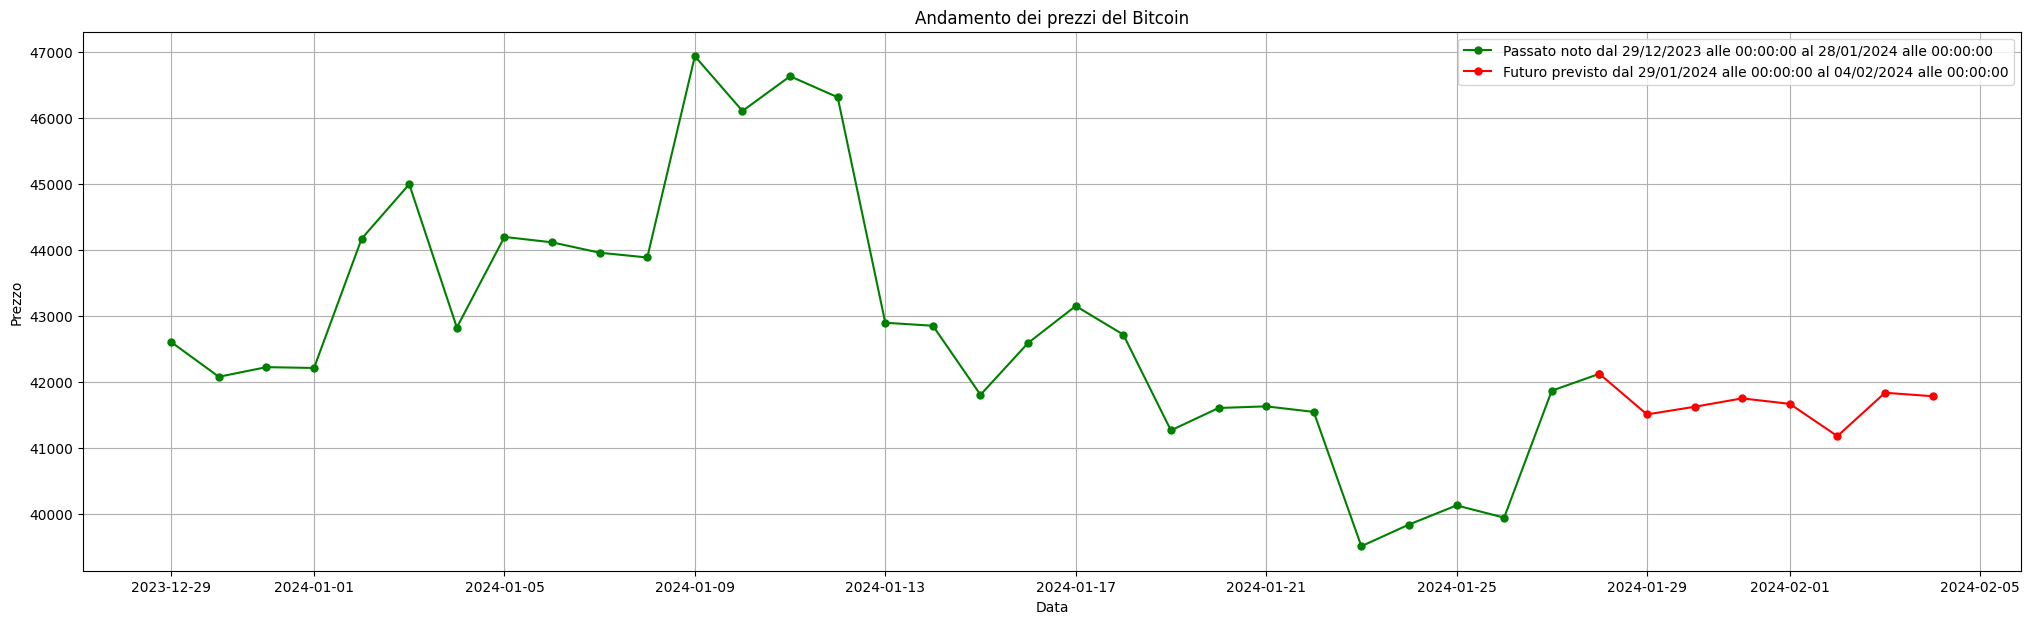

In [279]:
valori_generici = df_input_riadattato.T[::-1]

# Definisci i punti di divisione
passato = sum('passato' in column for column in input_data.columns)

# Crea il grafico
plt.figure(figsize=(25, 7))

# Plotta i primi passato valori in verde
plt.plot(df_passato_e_futuro['Timestamp'][:passato+1], df_passato_e_futuro['Price'][:passato+1], color='green', marker='o', markersize=5, linestyle='-')

# Plotta i restanti valori in rosso
plt.plot(df_passato_e_futuro['Timestamp'][passato:], df_passato_e_futuro['Price'][passato:], color='red', marker='o', markersize=5, linestyle='-')

# Personalizza il grafico
plt.title('Andamento dei prezzi del Bitcoin')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend([f"Passato noto dal {str(ultimi_31_giorni['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(ultimi_31_giorni['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}", f"Futuro previsto dal {str(df_futuro['Timestamp'].iloc[0].strftime('%d/%m/%Y alle %H:%M:%S'))} al {str(df_futuro['Timestamp'].iloc[-1].strftime('%d/%m/%Y alle %H:%M:%S'))}"])
plt.grid(True)

# Mostra il grafico
plt.show()

### Costruzione dataset con features miste

<h6> Dataset con previsione di prezzo_futuro_1 (modello utilizzato: 12_1) </h6>

In [107]:
nuovo_df

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_futuro_1,prezzo_futuro_2,prezzo_futuro_3,prezzo_futuro_4,prezzo_futuro_5,prezzo_futuro_6,prezzo_futuro_7,Giorno,Mese,Anno
0,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,120.501000,...,132.130000,127.401000,127.980000,129.090000,121.300000,121.160000,121.309000,28,5,2013
1,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,...,127.401000,127.980000,129.090000,121.300000,121.160000,121.309000,121.714000,29,5,2013
2,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,...,127.980000,129.090000,121.300000,121.160000,121.309000,121.714000,119.000000,30,5,2013
3,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,...,129.090000,121.300000,121.160000,121.309000,121.714000,119.000000,110.090000,31,5,2013
4,129.090000,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,...,121.300000,121.160000,121.309000,121.714000,119.000000,110.090000,108.401000,1,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,37464.832932,...,39481.666416,39960.275420,41974.331773,44105.944773,43788.288808,43270.119560,44202.176109,2,12,2023
3839,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,...,39960.275420,41974.331773,44105.944773,43788.288808,43270.119560,44202.176109,43745.491992,3,12,2023
3840,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,...,41974.331773,44105.944773,43788.288808,43270.119560,44202.176109,43745.491992,43757.959938,4,12,2023
3841,41974.331773,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,...,44105.944773,43788.288808,43270.119560,44202.176109,43745.491992,43757.959938,41200.962726,5,12,2023


In [120]:
df_misto_1 = nuovo_df.copy()

In [121]:
percorso_modello_1 = trova_modello(12, 1, percorso_modelli, '.h5')
percorso_modello_1

'C:\\Users\\Alessandro\\Desktop\\Cartelle\\Mie\\Programmi personali in Python\\Kaggle\\Bitcoin Historical Dataset\\Modelli\\Reti neurali\\12 - Modelli con reti neurali 20-12-2023_18-37-29 (prezzo_futuro_1_zoom_10_45)\\MAE\\1 - MAE838.928, L20, mV-10, MV10, P1, AHrelu, AOlinear, BS100, ME10000, MOval_mape, PA70, OPadam, LOmae, METmape, SV42 (20-12-2023_18-48-25).h5'

In [122]:
modello_1 = load_model(percorso_modello_1)

In [123]:
df_misto_1.iloc[:, 0:31]

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_passato_30
0,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,120.501000,...,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000,141.960000,135.300000
1,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,...,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000,141.960000
2,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,...,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000
3,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,...,118.780000,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000
4,129.090000,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,...,113.010000,118.780000,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,37464.832932,...,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369,34924.055450,35457.454912
3839,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,...,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369,34924.055450
3840,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,...,37067.696982,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369
3841,41974.331773,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,...,36549.162048,37067.696982,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835


In [124]:
df_misto_1['prezzo_futuro_1_previsto'] = modello_1.predict(df_misto_1.iloc[:, 0:31])

119/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [125]:
df_misto_1.iloc[:, -11:]

,prezzo_futuro_1,prezzo_futuro_2,prezzo_futuro_3,prezzo_futuro_4,prezzo_futuro_5,prezzo_futuro_6,prezzo_futuro_7,Giorno,Mese,Anno,prezzo_futuro_1_previsto
0,132.130000,127.401000,127.980000,129.090000,121.300000,121.160000,121.309000,28,5,2013,128.849915
1,127.401000,127.980000,129.090000,121.300000,121.160000,121.309000,121.714000,29,5,2013,132.416321
2,127.980000,129.090000,121.300000,121.160000,121.309000,121.714000,119.000000,30,5,2013,127.732735
3,129.090000,121.300000,121.160000,121.309000,121.714000,119.000000,110.090000,31,5,2013,128.822571
4,121.300000,121.160000,121.309000,121.714000,119.000000,110.090000,108.401000,1,6,2013,128.588196
...,...,...,...,...,...,...,...,...,...,...,...
3838,39481.666416,39960.275420,41974.331773,44105.944773,43788.288808,43270.119560,44202.176109,2,12,2023,38506.648438
3839,39960.275420,41974.331773,44105.944773,43788.288808,43270.119560,44202.176109,43745.491992,3,12,2023,39119.648438
3840,41974.331773,44105.944773,43788.288808,43270.119560,44202.176109,43745.491992,43757.959938,4,12,2023,39789.648438
3841,44105.944773,43788.288808,43270.119560,44202.176109,43745.491992,43757.959938,41200.962726,5,12,2023,41836.648438


In [126]:
df_misto_1 = df_misto_1.drop(['prezzo_futuro_1', 'prezzo_futuro_3', 'prezzo_futuro_4', 'prezzo_futuro_5', 'prezzo_futuro_6', 'prezzo_futuro_7', 'Giorno', 'Mese', 'Anno', 'prezzo_passato_30'], axis=1)

In [127]:
df_misto_1

,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,prezzo_passato_9,...,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_futuro_2,prezzo_futuro_1_previsto
0,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,120.501000,...,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000,141.960000,127.401000,128.849915
1,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,...,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000,127.980000,132.416321
2,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,...,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,129.090000,127.732735
3,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,...,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,121.300000,128.822571
4,129.090000,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,...,118.780000,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,121.160000,128.588196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,37464.832932,...,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369,34924.055450,39960.275420,38506.648438
3839,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,...,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369,41974.331773,39119.648438
3840,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,...,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,44105.944773,39789.648438
3841,41974.331773,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,...,37067.696982,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,43788.288808,41836.648438


In [128]:
move_column_inplace(df_misto_1,'prezzo_futuro_1_previsto', 0)

In [129]:
df_misto_1

,prezzo_futuro_1_previsto,prezzo_presente,prezzo_passato_1,prezzo_passato_2,prezzo_passato_3,prezzo_passato_4,prezzo_passato_5,prezzo_passato_6,prezzo_passato_7,prezzo_passato_8,...,prezzo_passato_21,prezzo_passato_22,prezzo_passato_23,prezzo_passato_24,prezzo_passato_25,prezzo_passato_26,prezzo_passato_27,prezzo_passato_28,prezzo_passato_29,prezzo_futuro_2
0,128.849915,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,122.580000,...,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000,141.960000,127.401000
1,132.416321,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,122.900000,...,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,135.300000,127.980000
2,127.732735,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,123.000000,...,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,117.000000,129.090000
3,128.822571,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,125.748000,...,118.780000,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,103.430000,121.300000
4,128.588196,129.090000,127.980000,127.401000,132.130000,129.179000,128.985000,134.600000,130.770000,131.700000,...,113.010000,118.780000,113.000000,112.640000,106.400000,118.330000,116.790000,111.250000,91.010000,121.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,38506.648438,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,37293.316127,...,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369,34924.055450,39960.275420
3839,39119.648438,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,37738.931697,...,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,34731.381369,41974.331773
3840,39789.648438,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,37809.852866,...,37067.696982,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,35048.407835,44105.944773
3841,41836.648438,41974.331773,39960.275420,39481.666416,38688.258742,37711.818376,37810.346417,37802.236044,37250.169051,37491.838186,...,36549.162048,37067.696982,37122.722824,37344.249001,36768.420819,35795.080631,35436.537630,35031.268882,35061.928749,43788.288808


In [130]:
# df_misto_1.to_excel(f'Dataset Bitcoin esteso da me (passato_{passato}, futuro_{futuro}, periodo originale dal {giorno_iniziale}_{mese_iniziale}_{anno_iniziale} al {giorno_finale}_{mese_finale}_{anno_finale}) features miste da 1 a 1.xlsx', index=False)